In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
df = pd.read_csv('covidDataCleaned.csv')

Unnamed: 0
zcta
Percent Over 65
Percent Non White
Household Size
Household 65+
Income
Covid Infection Rate
Covid Death Rate
Overcrowding
[ 1.42378320e+02  5.73890322e+01  5.59286366e+01 -8.38174717e+01
 -1.10209780e-01  2.27306180e+01]


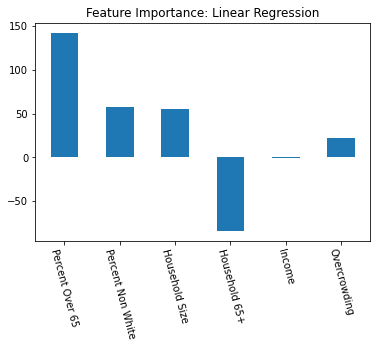

In [3]:
for row in df:
    print(row)
    
from sklearn.linear_model import LinearRegression as lr
from sklearn.tree import DecisionTreeRegressor as tree


from sklearn.preprocessing import StandardScaler as ss

inputData = ['Percent Over 65','Percent Non White',
'Household Size',
'Household 65+',
'Income',
'Overcrowding']

x_train = []
for d in inputData:
    x_train.append(df[d].values)
x_train = np.array(x_train).T

scale = ss()
scale.fit(x_train)
x_train2 = scale.transform(x_train)

households = df['Overcrowding'].values
coviddeaths = df['Covid Death Rate'].values

l = lr()

l.fit(x_train2,coviddeaths)


print(l.coef_)

plt.figure()
plt.title('Feature Importance: Linear Regression')
plt.bar(inputData,l.coef_, width=0.5)
plt.xticks(range(len(inputData)), inputData, rotation=360-75)
# plt.savefig('FeatImpDecTree.pdf',bbox_inches = "tight")
plt.show()


# xvals = np.linspace(min(households),max(households),100)
# yvals = l.coef_[0]*xvals + l.intercept_ 


# plt.figure()
# plt.scatter(households,coviddeaths)
# plt.xlabel('Percent Overcrowded')
# plt.ylabel('Covid Deaths \n per 100000')
# plt.plot(xvals,yvals, color='darkblue')
# plt.savefig('OvercrowdingVsCovid.pdf')
# plt.show()

# zcta = df['zcta'].values

# crowding = []

# for z in zcta:
#     crowding.append(zipmap[z])

# df['Overcrowding']= np.array(crowding)

# print(df.head())

# df.to_csv('covidDataCleaned.csv',index = False)

In [21]:
overcrowdingdf = pd.read_csv('ACSDT5Y2019.B25014_data_with_overlays_2020-12-20T194447.csv')
metadatadf = pd.read_csv('ACSDT5Y2019.B25014_metadata_2020-12-20T194447.csv')

In [22]:
print(metadatadf)
total_pops = overcrowdingdf['B25014_001E'].values[1:].astype(float) + overcrowdingdf['B25014_008E'].values[1:].astype(float)
overcrowded = overcrowdingdf['B25014_005E'].values[1:].astype(float) + overcrowdingdf['B25014_006E'].values[1:].astype(float) + overcrowdingdf['B25014_007E'].values[1:].astype(float)
overcrowded += overcrowdingdf['B25014_011E'].values[1:].astype(float)
overcrowded += overcrowdingdf['B25014_012E'].values[1:].astype(float)
overcrowded += overcrowdingdf['B25014_013E'].values[1:].astype(float)


for i in range(len(overcrowded)):
    if total_pops[i]>0:
    
        overcrowded[i]/= total_pops[i]
    else:
        overcrowded[i] = 0

zips = overcrowdingdf['NAME'].values[1:]

for i in range(len(zips)):
    zipval = zips[i]
    zipval = int(zipval.split(' ')[1])
    zips[i] = zipval


zipmap = dict(zip(zips,overcrowded))
print(zipmap)

         GEO_ID                                                 id
0          NAME                               Geographic Area Name
1   B25014_001E                                   Estimate!!Total:
2   B25014_001M                            Margin of Error!!Total:
3   B25014_002E                  Estimate!!Total:!!Owner occupied:
4   B25014_002M           Margin of Error!!Total:!!Owner occupied:
5   B25014_003E  Estimate!!Total:!!Owner occupied:!!0.50 or les...
6   B25014_003M  Margin of Error!!Total:!!Owner occupied:!!0.50...
7   B25014_004E  Estimate!!Total:!!Owner occupied:!!0.51 to 1.0...
8   B25014_004M  Margin of Error!!Total:!!Owner occupied:!!0.51...
9   B25014_005E  Estimate!!Total:!!Owner occupied:!!1.01 to 1.5...
10  B25014_005M  Margin of Error!!Total:!!Owner occupied:!!1.01...
11  B25014_006E  Estimate!!Total:!!Owner occupied:!!1.51 to 2.0...
12  B25014_006M  Margin of Error!!Total:!!Owner occupied:!!1.51...
13  B25014_007E  Estimate!!Total:!!Owner occupied:!!2.01 or mo

In [10]:
from sklearn.linear_model import LinearRegression as lr
from sklearn.tree import DecisionTreeRegressor as tree


from sklearn.preprocessing import StandardScaler as ss

dfhome = pd.read_csv('average_percent_of_people_staying_at_home_per_day_combined (1).csv')
dfdeaths = pd.read_csv('JHUDataDeaths.csv')
dfdeaths = dfdeaths[dfdeaths['Population']>200000]
dfdeaths = dfdeaths[dfdeaths['4/20/20']>100]
dfdeaths = dfdeaths[dfdeaths['4/20/20']<170]

counties = dfdeaths['Admin2'].values
percent_at_home = []
for c in counties:
    
    newdf = dfhome[dfhome['county_name']== c]
    stayhome = newdf['202005'].values[0]
    percent_at_home.append(stayhome)

counties_at_home = dict(zip(counties,percent_at_home))

counties_below_20 =[]
counties_between_20_25 = []
counties_between_25_30 = []
counties_above_30 = []

for k in list(counties_at_home.keys()):
    if counties_at_home[k] <20:
        counties_below_20.append(k)
    elif counties_at_home[k] <25:
        counties_between_20_25.append(k)
    elif counties_at_home[k] <30:
        counties_between_25_30.append(k)
    else:
        counties_above_30.append(k)
        
#these give a decent result:
# mindate = 120
# maxdate = 160
# preddate = 170
# (100, 135, 225)
# (110, 125, 155)
# (80,95,110)
mindate = 70
maxdate = 100
preddate = 105



below_20_data = []
below_20_predict = []
for c in counties_below_20:
    dfdeathsnew = dfdeaths[dfdeaths['Admin2']==c]
    
    
    vals = dfdeathsnew.iloc[0,mindate:maxdate].values - dfdeathsnew.iloc[0,:].values[mindate-1]
    
    
    
    
    population = float(dfdeathsnew['Population'].values[0])
    val = dfdeathsnew.iloc[0,:].values[preddate]- dfdeathsnew.iloc[0,:].values[mindate-1]
    val/=population
    vals/=population
    val*=600000
    vals*=600000
    
    
    below_20_data.append(vals)
    
    
    below_20_predict.append(val)
below_20_predict = np.array(below_20_predict)  
    
below_20_data = np.array(below_20_data)

between_20_25_data = []
between_20_25_predict = []
for c in counties_between_20_25:
    dfdeathsnew = dfdeaths[dfdeaths['Admin2']==c]
    vals = dfdeathsnew.iloc[0,mindate:maxdate].values - dfdeathsnew.iloc[0,:].values[mindate-1]
    
    val = dfdeathsnew.iloc[0,:].values[preddate]- dfdeathsnew.iloc[0,:].values[mindate-1]
    population = float(dfdeathsnew['Population'].values[0])
    val/=population
    vals/=population
    val*=600000
    vals*=600000
    
    between_20_25_data.append(vals)
    
    
    between_20_25_predict.append(val)
    
between_20_25_predict = np.array(between_20_25_predict)
    
between_20_25_data = np.array(between_20_25_data)

between_25_30_data = []
between_25_30_predict = []
for c in counties_between_25_30:
    dfdeathsnew = dfdeaths[dfdeaths['Admin2']==c]
    vals = dfdeathsnew.iloc[0,mindate:maxdate].values- dfdeathsnew.iloc[0,:].values[mindate-1]
    
    val = dfdeathsnew.iloc[0,:].values[preddate] - dfdeathsnew.iloc[0,:].values[mindate-1]
    population = float(dfdeathsnew['Population'].values[0])
    val/=population
    vals/=population
    val*=600000
    vals*=600000
    
    between_25_30_data.append(vals)
    
    
    
    between_25_30_predict.append(val)
between_25_30_data = np.array(between_25_30_data)
between_25_30_predict = np.array(between_25_30_predict)

above_30_predict = []
above_30_data = []
for c in counties_above_30:
    dfdeathsnew = dfdeaths[dfdeaths['Admin2']==c]
    vals = dfdeathsnew.iloc[0,mindate:maxdate].values- dfdeathsnew.iloc[0,:].values[mindate-1]
    
    val = dfdeathsnew.iloc[0,:].values[preddate] - dfdeathsnew.iloc[0,:].values[mindate-1]
    population = float(dfdeathsnew['Population'].values[0])
    val/=population
    vals/=population
    val*=600000
    vals*=600000
    above_30_data.append(vals)
    
    
    
    above_30_predict.append(val)
above_30_data = np.array(above_30_data)
above_30_predict = np.array(above_30_predict)





In [24]:
import numpy as np
def returnWeights(X,y,lam=.01):
    X = X.astype(float)
    y = y.astype(float)
    try:
        alpha = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y))
    except:
        alpha = np.linalg.inv(X.T.dot(X)+lam*np.eye(X.shape[1])).dot(X.T.dot(y))
    return alpha

data_to_plot = []

for c in list(counties_at_home.keys()):
    dfdeathsnew = dfdeaths[dfdeaths['Admin2']==c]
    
#     print(dfdeathsnew)
    population = dfdeathsnew['Population'].values[0]
    val = dfdeathsnew.iloc[0,:].values[preddate]/population
    val*=100000
    at_home_perc = counties_at_home[c]
    data_to_plot.append([at_home_perc,val])
    
# data_to_plot = np.array(data_to_plot)
# plt.figure()
# plt.scatter(data_to_plot[:,0],data_to_plot[:,1])
# plt.show()
# assert False

for i in range(len(below_20_data)):
    
    y_train = below_20_data[i,:]
    
    alpha1 = returnWeights(between_20_25_data.T,y_train)
    alpha2 = returnWeights(between_25_30_data.T,y_train)
    alpha3 = returnWeights(above_30_data.T,y_train)
    
    val1 = alpha1.dot(between_20_25_predict)
    at_home_perc1 = 22.5+ 4*(np.random.rand()-.5)
    val2 = alpha2.dot(between_25_30_predict)
    at_home_perc2 = 27.5+ 4*(np.random.rand()-.5)
    val3 = alpha3.dot(above_30_predict)
    at_home_perc3 = 35+ 4*(np.random.rand()-.5)
    
    data_to_plot.append([at_home_perc1,val1])
    data_to_plot.append([at_home_perc2,val2])
    data_to_plot.append([at_home_perc3,val3])
    
for i in range(len(between_20_25_data)):
    
    y_train = between_20_25_data[i,:]
    
    alpha1 = returnWeights(below_20_data.T,y_train)
    alpha2 = returnWeights(between_25_30_data.T,y_train)
    alpha3 = returnWeights(above_30_data.T,y_train)
    
    val1 = alpha1.dot(below_20_predict)
    at_home_perc1 = 17+ 4*(np.random.rand()-.5)
    val2 = alpha2.dot(between_25_30_predict)
    at_home_perc2 = 27.5+ 4*(np.random.rand()-.5)
    val3 = alpha3.dot(above_30_predict)
    at_home_perc3 = 35+ 4*(np.random.rand()-.5)
    
    data_to_plot.append([at_home_perc1,val1])
    data_to_plot.append([at_home_perc2,val2])
    data_to_plot.append([at_home_perc3,val3])
    
for i in range(len(between_25_30_data)):
    
    y_train = between_25_30_data[i,:]
    
    alpha1 = returnWeights(below_20_data.T,y_train)
    alpha2 = returnWeights(between_20_25_data.T,y_train)
    alpha3 = returnWeights(above_30_data.T,y_train)
    
    val1 = alpha1.dot(below_20_predict)
    at_home_perc1 = 17+ 4*(np.random.rand()-.5)
    val2 = alpha2.dot(between_20_25_predict)
    at_home_perc2 = 22.5+ 4*(np.random.rand()-.5)
    val3 = alpha3.dot(above_30_predict)
    at_home_perc3 = 35+ 4*(np.random.rand()-.5)
    
    data_to_plot.append([at_home_perc1,val1])
    data_to_plot.append([at_home_perc2,val2])
    data_to_plot.append([at_home_perc3,val3])

for i in range(len(above_30_data)):
    
    y_train = above_30_data[i,:]
    
    alpha1 = returnWeights(below_20_data.T,y_train)
    alpha2 = returnWeights(between_20_25_data.T,y_train)
    alpha3 = returnWeights(between_25_30_data.T,y_train)
    
    val1 = alpha1.dot(below_20_predict)
    at_home_perc1 = 17+ 4*(np.random.rand()-.5)
    val2 = alpha2.dot(between_20_25_predict)
    at_home_perc2 = 22.5+ 4*(np.random.rand()-.5)
    val3 = alpha3.dot(between_25_30_predict)
    at_home_perc3 = 27.5+ 4*(np.random.rand()-.5)
    
    data_to_plot.append([at_home_perc1,val1])
    data_to_plot.append([at_home_perc2,val2])
    data_to_plot.append([at_home_perc3,val3])





# alpha = returnWeights(above_30_data.T,below_20_data[0,:])
# #so what is this first rows value predicted to be:
# pred_val = alpha.dot(above_30_predict)

# real_val = below_20_predict[0]

# print(pred_val)
# print(real_val)

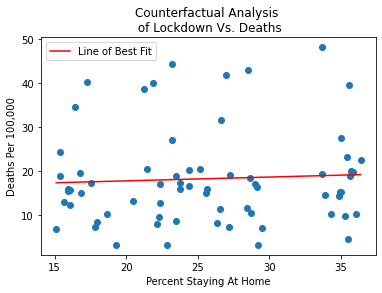

In [25]:
data_to_plot = np.array(data_to_plot)

l = lr()

l.fit(data_to_plot[:,0].reshape(-1,1),data_to_plot[:,1])
intercept = l.intercept_

xvals = np.linspace(min(data_to_plot[:,0]),max(data_to_plot[:,0]))
yvals = xvals*l.coef_+l.intercept_


plt.figure()
plt.scatter(data_to_plot[:,0],data_to_plot[:,1])
plt.plot(xvals,yvals,c='red', label ='Line of Best Fit')
plt.legend()
plt.ylabel('Deaths Per 100,000')
plt.title('Counterfactual Analysis \n of Lockdown Vs. Deaths')
plt.xlabel('Percent Staying At Home')
# plt.savefig('counterfactualFlora.pdf', bbox_inches ='tight')
plt.show()



In [26]:
def lineslopefunc(mindate,maxdate,preddate, plot = False):


    below_20_data = []
    below_20_predict = []
    for c in counties_below_20:
        dfdeathsnew = dfdeaths[dfdeaths['Admin2']==c]


        vals = dfdeathsnew.iloc[0,mindate:maxdate].values - dfdeathsnew.iloc[0,:].values[mindate-1]




        population = float(dfdeathsnew['Population'].values[0])
        val = dfdeathsnew.iloc[0,:].values[preddate]- dfdeathsnew.iloc[0,:].values[mindate-1]
        val/=population
        vals/=population
        val*=600000
        vals*=600000


        below_20_data.append(vals)


        below_20_predict.append(val)
    below_20_predict = np.array(below_20_predict)  

    below_20_data = np.array(below_20_data)

    between_20_25_data = []
    between_20_25_predict = []
    for c in counties_between_20_25:
        dfdeathsnew = dfdeaths[dfdeaths['Admin2']==c]
        vals = dfdeathsnew.iloc[0,mindate:maxdate].values - dfdeathsnew.iloc[0,:].values[mindate-1]

        val = dfdeathsnew.iloc[0,:].values[preddate]- dfdeathsnew.iloc[0,:].values[mindate-1]
        population = float(dfdeathsnew['Population'].values[0])
        val/=population
        vals/=population
        val*=600000
        vals*=600000

        between_20_25_data.append(vals)


        between_20_25_predict.append(val)

    between_20_25_predict = np.array(between_20_25_predict)

    between_20_25_data = np.array(between_20_25_data)

    between_25_30_data = []
    between_25_30_predict = []
    for c in counties_between_25_30:
        dfdeathsnew = dfdeaths[dfdeaths['Admin2']==c]
        vals = dfdeathsnew.iloc[0,mindate:maxdate].values- dfdeathsnew.iloc[0,:].values[mindate-1]

        val = dfdeathsnew.iloc[0,:].values[preddate] - dfdeathsnew.iloc[0,:].values[mindate-1]
        population = float(dfdeathsnew['Population'].values[0])
        val/=population
        vals/=population
        val*=600000
        vals*=600000

        between_25_30_data.append(vals)



        between_25_30_predict.append(val)
    between_25_30_data = np.array(between_25_30_data)
    between_25_30_predict = np.array(between_25_30_predict)

    above_30_predict = []
    above_30_data = []
    for c in counties_above_30:
        dfdeathsnew = dfdeaths[dfdeaths['Admin2']==c]
        vals = dfdeathsnew.iloc[0,mindate:maxdate].values- dfdeathsnew.iloc[0,:].values[mindate-1]

        val = dfdeathsnew.iloc[0,:].values[preddate] - dfdeathsnew.iloc[0,:].values[mindate-1]
        population = float(dfdeathsnew['Population'].values[0])
        val/=population
        vals/=population
        val*=600000
        vals*=600000
        above_30_data.append(vals)



        above_30_predict.append(val)
    above_30_data = np.array(above_30_data)
    above_30_predict = np.array(above_30_predict)


    data_to_plot = []

    for c in list(counties_at_home.keys()):
        dfdeathsnew = dfdeaths[dfdeaths['Admin2']==c]

    #     print(dfdeathsnew)
        population = dfdeathsnew['Population'].values[0]
        val = dfdeathsnew.iloc[0,:].values[preddate]/population
        val*=100000
        at_home_perc = counties_at_home[c]
        data_to_plot.append([at_home_perc,val])

    # data_to_plot = np.array(data_to_plot)
    # plt.figure()
    # plt.scatter(data_to_plot[:,0],data_to_plot[:,1])
    # plt.show()
    # assert False

    for i in range(len(below_20_data)):

        y_train = below_20_data[i,:]

        alpha1 = returnWeights(between_20_25_data.T,y_train)
        alpha2 = returnWeights(between_25_30_data.T,y_train)
        alpha3 = returnWeights(above_30_data.T,y_train)

        val1 = alpha1.dot(between_20_25_predict)
        at_home_perc1 = 22.5+ 4*(np.random.rand()-.5)
        val2 = alpha2.dot(between_25_30_predict)
        at_home_perc2 = 27.5+ 4*(np.random.rand()-.5)
        val3 = alpha3.dot(above_30_predict)
        at_home_perc3 = 35+ 4*(np.random.rand()-.5)

        data_to_plot.append([at_home_perc1,val1])
        data_to_plot.append([at_home_perc2,val2])
        data_to_plot.append([at_home_perc3,val3])

    for i in range(len(between_20_25_data)):

        y_train = between_20_25_data[i,:]

        alpha1 = returnWeights(below_20_data.T,y_train)
        alpha2 = returnWeights(between_25_30_data.T,y_train)
        alpha3 = returnWeights(above_30_data.T,y_train)

        val1 = alpha1.dot(below_20_predict)
        at_home_perc1 = 17+ 4*(np.random.rand()-.5)
        val2 = alpha2.dot(between_25_30_predict)
        at_home_perc2 = 27.5+ 4*(np.random.rand()-.5)
        val3 = alpha3.dot(above_30_predict)
        at_home_perc3 = 35+ 4*(np.random.rand()-.5)

        data_to_plot.append([at_home_perc1,val1])
        data_to_plot.append([at_home_perc2,val2])
        data_to_plot.append([at_home_perc3,val3])

    for i in range(len(between_25_30_data)):

        y_train = between_25_30_data[i,:]

        alpha1 = returnWeights(below_20_data.T,y_train)
        alpha2 = returnWeights(between_20_25_data.T,y_train)
        alpha3 = returnWeights(above_30_data.T,y_train)

        val1 = alpha1.dot(below_20_predict)
        at_home_perc1 = 17+ 4*(np.random.rand()-.5)
        val2 = alpha2.dot(between_20_25_predict)
        at_home_perc2 = 22.5+ 4*(np.random.rand()-.5)
        val3 = alpha3.dot(above_30_predict)
        at_home_perc3 = 35+ 4*(np.random.rand()-.5)

        data_to_plot.append([at_home_perc1,val1])
        data_to_plot.append([at_home_perc2,val2])
        data_to_plot.append([at_home_perc3,val3])

    for i in range(len(above_30_data)):

        y_train = above_30_data[i,:]

        alpha1 = returnWeights(below_20_data.T,y_train)
        alpha2 = returnWeights(between_20_25_data.T,y_train)
        alpha3 = returnWeights(between_25_30_data.T,y_train)

        val1 = alpha1.dot(below_20_predict)
        at_home_perc1 = 17+ 4*(np.random.rand()-.5)
        val2 = alpha2.dot(between_20_25_predict)
        at_home_perc2 = 22.5+ 4*(np.random.rand()-.5)
        val3 = alpha3.dot(between_25_30_predict)
        at_home_perc3 = 27.5+ 4*(np.random.rand()-.5)

        data_to_plot.append([at_home_perc1,val1])
        data_to_plot.append([at_home_perc2,val2])
        data_to_plot.append([at_home_perc3,val3])

    data_to_plot = np.array(data_to_plot)

    l = lr()

    l.fit(data_to_plot[:,0].reshape(-1,1),data_to_plot[:,1])
    coef = l.coef_
    
    if plot:
        xvals = np.linspace(min(data_to_plot[:,0]),max(data_to_plot[:,0]))
        yvals = xvals*l.coef_+l.intercept_


        plt.figure()
        plt.scatter(data_to_plot[:,0],data_to_plot[:,1])
        plt.plot(xvals,yvals,c='red', label ='Line of Best Fit')
        plt.legend()
        plt.ylabel('Deaths Per 100,000')
        plt.title('Counterfactual Analysis \n of Lockdown Vs. Deaths')
        plt.xlabel('Percent Staying At Home')
        # plt.savefig('counterfactualFlora.pdf', bbox_inches ='tight')
        plt.show()
        
    
    return coef



In [27]:
vals = []
minvals = np.arange(40,120,5)
maxvals = np.arange(50,160,5)
predvals = np.arange(60,190,10)

for ii in minvals:
    for jj in maxvals:
        for kk in predvals:
            if ii+10 < jj and jj+5 < kk:
                
                vals.append([(ii,jj,kk),lineslopefunc(ii,jj,kk)])
                print((ii,jj,kk),lineslopefunc(ii,jj,kk))
vals = sorted(vals,key = lambda row: row[1])

print(vals[:5])



(40, 55, 70) [-0.00031653]
(40, 55, 80) [-0.00437984]
(40, 55, 90) [-0.04268854]
(40, 55, 100) [-0.12196573]
(40, 55, 110) [-0.25658275]
(40, 55, 120) [-0.34464744]
(40, 55, 130) [-0.39757581]
(40, 55, 140) [-0.46340342]
(40, 55, 150) [-0.55367855]
(40, 55, 160) [-0.55344198]
(40, 55, 170) [-0.60760287]
(40, 55, 180) [-0.68456357]
(40, 60, 70) [-0.00034118]
(40, 60, 80) [-0.00398359]
(40, 60, 90) [-0.0437648]
(40, 60, 100) [-0.11516361]
(40, 60, 110) [-0.26930378]
(40, 60, 120) [-0.30626681]
(40, 60, 130) [-0.34180394]
(40, 60, 140) [-0.49222331]
(40, 60, 150) [-0.51364987]
(40, 60, 160) [-0.53847539]
(40, 60, 170) [-0.52193828]
(40, 60, 180) [-0.59509744]
(40, 65, 80) [-0.00433003]
(40, 65, 90) [-0.04323479]
(40, 65, 100) [-0.12659658]
(40, 65, 110) [-0.23992218]
(40, 65, 120) [-0.34450183]
(40, 65, 130) [-0.40248078]
(40, 65, 140) [-0.40347741]
(40, 65, 150) [-0.49652567]
(40, 65, 160) [-0.51056837]
(40, 65, 170) [-0.59146926]
(40, 65, 180) [-0.6437286]
(40, 70, 80) [-0.01274865]
(40

(50, 65, 140) [-0.44252346]
(50, 65, 150) [-0.4791767]
(50, 65, 160) [-0.50471365]
(50, 65, 170) [-0.57871454]
(50, 65, 180) [-0.55555045]
(50, 70, 80) [-0.01863402]
(50, 70, 90) [-0.09521983]
(50, 70, 100) [-0.23417332]
(50, 70, 110) [-0.47534493]
(50, 70, 120) [-0.54905252]
(50, 70, 130) [-0.68592428]
(50, 70, 140) [-0.8487211]
(50, 70, 150) [-0.92184676]
(50, 70, 160) [-0.97675829]
(50, 70, 170) [-1.10935535]
(50, 70, 180) [-1.44294002]
(50, 75, 90) [-0.2340293]
(50, 75, 100) [-0.22603037]
(50, 75, 110) [-0.13440277]
(50, 75, 120) [0.38035104]
(50, 75, 130) [0.52093745]
(50, 75, 140) [0.45812246]
(50, 75, 150) [2.03592813]
(50, 75, 160) [0.54755567]
(50, 75, 170) [0.80269799]
(50, 75, 180) [-1.07967511]
(50, 80, 90) [-0.30902115]
(50, 80, 100) [-0.10671655]
(50, 80, 110) [-1.08774017]
(50, 80, 120) [0.1178399]
(50, 80, 130) [0.14929177]
(50, 80, 140) [0.76404267]
(50, 80, 150) [-0.48285393]
(50, 80, 160) [-1.26202668]
(50, 80, 170) [0.15556258]
(50, 80, 180) [-4.92645195]
(50, 85, 1

(60, 105, 150) [8.68187727]
(60, 105, 160) [8.49800519]
(60, 105, 170) [7.76576694]
(60, 105, 180) [7.48634398]
(60, 110, 120) [3.60291455]
(60, 110, 130) [6.46175539]
(60, 110, 140) [7.34073777]
(60, 110, 150) [6.83494106]
(60, 110, 160) [8.86403871]
(60, 110, 170) [6.62928912]
(60, 110, 180) [4.30581716]
(60, 115, 130) [5.74311311]
(60, 115, 140) [7.84424451]
(60, 115, 150) [6.74936703]
(60, 115, 160) [8.38441809]
(60, 115, 170) [10.13356134]
(60, 115, 180) [11.38369692]
(60, 120, 130) [4.68993769]
(60, 120, 140) [5.997991]
(60, 120, 150) [6.35958618]
(60, 120, 160) [8.67589283]
(60, 120, 170) [12.30888678]
(60, 120, 180) [13.58489645]
(60, 125, 140) [5.57254914]
(60, 125, 150) [6.63727238]
(60, 125, 160) [8.21793359]
(60, 125, 170) [9.53445832]
(60, 125, 180) [17.36595258]
(60, 130, 140) [5.11541282]
(60, 130, 150) [6.98102583]
(60, 130, 160) [9.11209138]
(60, 130, 170) [12.21442961]
(60, 130, 180) [20.21476502]
(60, 135, 150) [5.69069392]
(60, 135, 160) [8.83810363]
(60, 135, 170) 

(75, 135, 180) [21.49158848]
(75, 140, 150) [6.20335224]
(75, 140, 160) [6.86672276]
(75, 140, 170) [9.83785951]
(75, 140, 180) [13.82610812]
(75, 145, 160) [3.12679751]
(75, 145, 170) [2.66125782]
(75, 145, 180) [0.16949184]
(75, 150, 160) [3.25216515]
(75, 150, 170) [0.74420698]
(75, 150, 180) [-4.73175435]
(75, 155, 170) [0.28459857]
(75, 155, 180) [-5.40859568]
(80, 95, 110) [-4.29878513]
(80, 95, 120) [-4.03268139]
(80, 95, 130) [-3.36322999]
(80, 95, 140) [-3.58688654]
(80, 95, 150) [-3.79224956]
(80, 95, 160) [-3.9258974]
(80, 95, 170) [-3.18654768]
(80, 95, 180) [-4.04961885]
(80, 100, 110) [3.10941097]
(80, 100, 120) [4.75889383]
(80, 100, 130) [7.12244425]
(80, 100, 140) [7.56537952]
(80, 100, 150) [6.33839832]
(80, 100, 160) [9.1224374]
(80, 100, 170) [3.99340508]
(80, 100, 180) [3.23595191]
(80, 105, 120) [6.66184847]
(80, 105, 130) [9.107567]
(80, 105, 140) [8.43362859]
(80, 105, 150) [9.20786787]
(80, 105, 160) [7.95142704]
(80, 105, 170) [6.37609373]
(80, 105, 180) [2.47

(105, 130, 180) [-8.21603419]
(105, 135, 150) [0.94889857]
(105, 135, 160) [-1.18866641]
(105, 135, 170) [-1.46263494]
(105, 135, 180) [-8.28012697]
(105, 140, 150) [1.25653601]
(105, 140, 160) [0.19709985]
(105, 140, 170) [-1.34095378]
(105, 140, 180) [-5.23412403]
(105, 145, 160) [0.28163355]
(105, 145, 170) [-0.5507106]
(105, 145, 180) [-5.85706468]
(105, 150, 160) [0.86473803]
(105, 150, 170) [-1.00141236]
(105, 150, 180) [-1.2495841]
(105, 155, 170) [-0.60429722]
(105, 155, 180) [-3.10009371]
(110, 125, 140) [-0.30727022]
(110, 125, 150) [-0.44807422]
(110, 125, 160) [-3.32569952]
(110, 125, 170) [-4.35834451]
(110, 125, 180) [-14.22471362]
(110, 130, 140) [1.21723439]
(110, 130, 150) [-0.20800593]
(110, 130, 160) [-0.59862622]
(110, 130, 170) [-4.42953832]
(110, 130, 180) [-8.70937591]
(110, 135, 150) [-0.03952144]
(110, 135, 160) [-0.76762985]
(110, 135, 170) [-3.46308029]
(110, 135, 180) [-6.6027145]
(110, 140, 150) [1.17095835]
(110, 140, 160) [1.12830922]
(110, 140, 170) [-1.

NameError: name 'lineslopefunction' is not defined

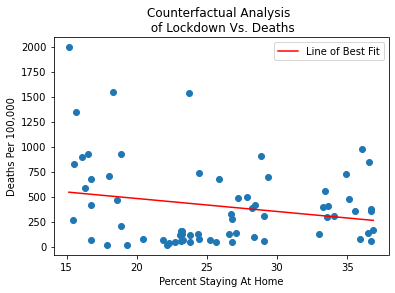

array([-12.97844468])

In [31]:
lineslopefunc(vals[0][0][0],vals[0][0][1],vals[0][0][2],plot = True)

In [27]:
dfhome = pd.read_csv('average_percent_of_people_staying_at_home_per_day_combined (1).csv')
dfdeaths = pd.read_csv('JHUDataDeaths.csv')
dfdeaths = dfdeaths[dfdeaths['Population']>200000]
dfdeaths = dfdeaths[dfdeaths['4/20/20']>100]
dfdeaths = dfdeaths[dfdeaths['4/20/20']<170]

counties = dfdeaths['Admin2'].values
percent_at_home = []
for c in counties:
    
    newdf = dfhome[dfhome['county_name']== c]
    stayhome = newdf['202005'].values[0]
    percent_at_home.append(stayhome)

counties_at_home = dict(zip(counties,percent_at_home))

counties_below_20 =[]
counties_between_20_25 = []
counties_between_25_30 = []
counties_above_30 = []

for k in list(counties_at_home.keys()):
    if counties_at_home[k] <20:
        counties_below_20.append(k)
    elif counties_at_home[k] <25:
        counties_between_20_25.append(k)
    elif counties_at_home[k] <30:
        counties_between_25_30.append(k)
    else:
        counties_above_30.append(k)
        
#these give a decent result:
# mindate = 110
# maxdate = 125
# preddate = 170


val_list = []

mindates = np.arange(50,120,5)
maxdates = np.arange(60,130,5)
preddates = np.arange(70,160,5)


for ii in mindates:
    for jj in maxdates:
        for kk in preddates:
            if (ii +10 < jj) and (jj +5< kk) and (kk<jj+40):
                print(ii,jj,kk)
                mindate = ii
                maxdate = jj
                preddate = kk
                
                try:


                    below_20_data = []
                    below_20_predict = []
                    for c in counties_below_20:
                        dfdeathsnew = dfdeaths[dfdeaths['Admin2']==c]
                        vals = dfdeathsnew.iloc[0,mindate:maxdate].values - dfdeathsnew.iloc[0,:].values[mindate-1]



                        below_20_data.append(vals)
                        val = dfdeathsnew.iloc[0,:].values[preddate]- dfdeathsnew.iloc[0,:].values[mindate-1]

                        below_20_predict.append(val)
                    below_20_predict = np.array(below_20_predict)  

                    below_20_data = np.array(below_20_data)

                    between_20_25_data = []
                    between_20_25_predict = []
                    for c in counties_between_20_25:
                        dfdeathsnew = dfdeaths[dfdeaths['Admin2']==c]
                        vals = dfdeathsnew.iloc[0,mindate:maxdate].values - dfdeathsnew.iloc[0,:].values[mindate-1]
                        between_20_25_data.append(vals)
                        val = dfdeathsnew.iloc[0,:].values[preddate]- dfdeathsnew.iloc[0,:].values[mindate-1]
                        between_20_25_predict.append(val)

                    between_20_25_predict = np.array(between_20_25_predict)

                    between_20_25_data = np.array(between_20_25_data)

                    between_25_30_data = []
                    between_25_30_predict = []
                    for c in counties_between_25_30:
                        dfdeathsnew = dfdeaths[dfdeaths['Admin2']==c]
                        vals = dfdeathsnew.iloc[0,mindate:maxdate].values- dfdeathsnew.iloc[0,:].values[mindate-1]
                        between_25_30_data.append(vals)
                        val = dfdeathsnew.iloc[0,:].values[preddate] - dfdeathsnew.iloc[0,:].values[mindate-1]
                        between_25_30_predict.append(val)
                    between_25_30_data = np.array(between_25_30_data)
                    between_25_30_predict = np.array(between_25_30_predict)

                    above_30_predict = []
                    above_30_data = []
                    for c in counties_above_30:
                        dfdeathsnew = dfdeaths[dfdeaths['Admin2']==c]
                        vals = dfdeathsnew.iloc[0,mindate:maxdate].values- dfdeathsnew.iloc[0,:].values[mindate-1]
                        above_30_data.append(vals)
                        val = dfdeathsnew.iloc[0,:].values[preddate] - dfdeathsnew.iloc[0,:].values[mindate-1]
                        above_30_predict.append(val)
                    above_30_data = np.array(above_30_data)
                    above_30_predict = np.array(above_30_predict)




                    data_to_plot = []

                    for c in list(counties_at_home.keys()):
                        dfdeathsnew = dfdeaths[dfdeaths['Admin2']==c]

                    #     print(dfdeathsnew)
                        val = dfdeathsnew.iloc[0,:].values[preddate]
                        at_home_perc = counties_at_home[c]
                        data_to_plot.append([at_home_perc,val])

                    for i in range(len(below_20_data)):

                        y_train = below_20_data[i,:]

                        alpha1 = returnWeights(between_20_25_data.T,y_train)
                        alpha2 = returnWeights(between_25_30_data.T,y_train)
                        alpha3 = returnWeights(above_30_data.T,y_train)

                        val1 = alpha1.dot(between_20_25_predict)
                        at_home_perc1 = 22.5+ 4*(np.random.rand()-.5)
                        val2 = alpha2.dot(between_25_30_predict)
                        at_home_perc2 = 27.5+ 4*(np.random.rand()-.5)
                        val3 = alpha3.dot(above_30_predict)
                        at_home_perc3 = 35+ 4*(np.random.rand()-.5)

                        data_to_plot.append([at_home_perc1,val1])
                        data_to_plot.append([at_home_perc2,val2])
                        data_to_plot.append([at_home_perc3,val3])

                    for i in range(len(between_20_25_data)):

                        y_train = between_20_25_data[i,:]

                        alpha1 = returnWeights(below_20_data.T,y_train)
                        alpha2 = returnWeights(between_25_30_data.T,y_train)
                        alpha3 = returnWeights(above_30_data.T,y_train)

                        val1 = alpha1.dot(below_20_predict)
                        at_home_perc1 = 17+ 4*(np.random.rand()-.5)
                        val2 = alpha2.dot(between_25_30_predict)
                        at_home_perc2 = 27.5+ 4*(np.random.rand()-.5)
                        val3 = alpha3.dot(above_30_predict)
                        at_home_perc3 = 35+ 4*(np.random.rand()-.5)

                        data_to_plot.append([at_home_perc1,val1])
                        data_to_plot.append([at_home_perc2,val2])
                        data_to_plot.append([at_home_perc3,val3])

                    for i in range(len(between_25_30_data)):

                        y_train = between_25_30_data[i,:]

                        alpha1 = returnWeights(below_20_data.T,y_train)
                        alpha2 = returnWeights(between_20_25_data.T,y_train)
                        alpha3 = returnWeights(above_30_data.T,y_train)

                        val1 = alpha1.dot(below_20_predict)
                        at_home_perc1 = 17+ 4*(np.random.rand()-.5)
                        val2 = alpha2.dot(between_20_25_predict)
                        at_home_perc2 = 22.5+ 4*(np.random.rand()-.5)
                        val3 = alpha3.dot(above_30_predict)
                        at_home_perc3 = 35+ 4*(np.random.rand()-.5)

                        data_to_plot.append([at_home_perc1,val1])
                        data_to_plot.append([at_home_perc2,val2])
                        data_to_plot.append([at_home_perc3,val3])

                    for i in range(len(above_30_data)):

                        y_train = above_30_data[i,:]

                        alpha1 = returnWeights(below_20_data.T,y_train)
                        alpha2 = returnWeights(between_20_25_data.T,y_train)
                        alpha3 = returnWeights(between_25_30_data.T,y_train)

                        val1 = alpha1.dot(below_20_predict)
                        at_home_perc1 = 17+ 4*(np.random.rand()-.5)
                        val2 = alpha2.dot(between_20_25_predict)
                        at_home_perc2 = 22.5+ 4*(np.random.rand()-.5)
                        val3 = alpha3.dot(between_25_30_predict)
                        at_home_perc3 = 27.5+ 4*(np.random.rand()-.5)

                        data_to_plot.append([at_home_perc1,val1])
                        data_to_plot.append([at_home_perc2,val2])
                        data_to_plot.append([at_home_perc3,val3])

                    data_to_plot = np.array(data_to_plot)
                except:
                    continue

                l = lr()

                l.fit(data_to_plot[:,0].reshape(-1,1),data_to_plot[:,1])
                
                val_list.append([(ii,jj,kk),l.coef_[0]])
#                 xvals = np.linspace(min(data_to_plot[:,0]),max(data_to_plot[:,0]))
#                 yvals = xvals*l.coef_+l.intercept_






50 65 75
50 65 80
50 65 85
50 65 90
50 65 95
50 65 100
50 70 80
50 70 85
50 70 90
50 70 95
50 70 100
50 70 105
50 75 85
50 75 90
50 75 95
50 75 100
50 75 105
50 75 110
50 80 90
50 80 95
50 80 100
50 80 105
50 80 110
50 80 115
50 85 95
50 85 100
50 85 105
50 85 110
50 85 115
50 85 120
50 90 100
50 90 105
50 90 110
50 90 115
50 90 120
50 90 125
50 95 105
50 95 110
50 95 115
50 95 120
50 95 125
50 95 130
50 100 110
50 100 115
50 100 120
50 100 125
50 100 130
50 100 135
50 105 115
50 105 120
50 105 125
50 105 130
50 105 135
50 105 140
50 110 120
50 110 125
50 110 130
50 110 135
50 110 140
50 110 145
50 115 125
50 115 130
50 115 135
50 115 140
50 115 145
50 115 150
50 120 130
50 120 135
50 120 140
50 120 145
50 120 150
50 120 155
50 125 135
50 125 140
50 125 145
50 125 150
50 125 155
55 70 80
55 70 85
55 70 90
55 70 95
55 70 100
55 70 105
55 75 85
55 75 90
55 75 95
55 75 100
55 75 105
55 75 110
55 80 90
55 80 95
55 80 100
55 80 105
55 80 110
55 80 115
55 85 95
55 85 100
55 85 105
55 85 110


In [28]:

val_list = sorted(val_list,key = lambda row:row[1])
print(val_list[:100])

[[(110, 125, 155), -5.725455646829167], [(80, 95, 130), -5.575893063274828], [(110, 125, 150), -5.4511139452681805], [(80, 95, 110), -4.798331933883166], [(105, 120, 155), -4.124556716177472], [(105, 125, 155), -4.080003731021886], [(80, 95, 120), -4.058630801879272], [(55, 95, 110), -3.9335637494122295], [(110, 125, 145), -3.583375347790953], [(60, 95, 110), -3.5129472519046034], [(75, 95, 110), -3.3855957913971997], [(50, 95, 110), -3.379719697549469], [(100, 125, 155), -3.306251220310618], [(105, 125, 150), -3.2459640432163073], [(70, 95, 110), -3.160589275824597], [(105, 120, 150), -3.1191338187054436], [(110, 125, 140), -3.050221221792549], [(65, 95, 110), -2.970757315249583], [(100, 120, 150), -2.8980461110697653], [(100, 120, 155), -2.8959274896216662], [(105, 125, 145), -2.5897884816849586], [(80, 95, 105), -2.497998298340684], [(110, 125, 135), -2.4087171649476398], [(105, 120, 140), -2.365116315860376], [(100, 125, 150), -2.364441030689675], [(100, 125, 140), -2.2884921998561

In [11]:
np.arange(20,30,5)

array([20, 25])